# Libraries Imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
import sklearn.model_selection
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading .csv file

In [2]:
dataset = pd.read_csv('grid.csv')
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Constant Variables

In [3]:
X = dataset.drop(['stab', 'stabf'], axis=1)
y = dataset['stabf']

feature_names=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

# Feature Scaling via Standardization

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes Classifier

Classification Report:

              precision    recall  f1-score       support
stable         0.830944  0.672560  0.743410   5430.000000
unstable       0.832343  0.922362  0.875043   9570.000000
accuracy       0.831933  0.831933  0.831933      0.831933
macro avg      0.831644  0.797461  0.809227  15000.000000
weighted avg   0.831837  0.831933  0.827392  15000.000000


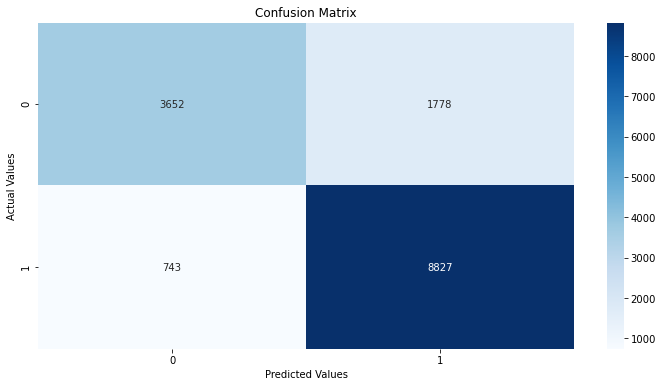

In [5]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))
# print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))
# print("")

print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

# Naive Bayes (GridSearchCV)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn

clf = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=900)

CV_nbc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv_method, scoring='accuracy')
CV_nbc.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=900),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

# Naive Bayes Best Parameters

In [7]:
CV_nbc.best_params_

{'var_smoothing': 2.310129700083158e-05}

# Naive Bayes w/ New Parameters

In [11]:
nbc = GaussianNB(var_smoothing = 2.310129700083158e-05)
nbc.fit(X_train,y_train)
y_pred = nbc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score       support
stable         0.830944  0.672560  0.743410   5430.000000
unstable       0.832343  0.922362  0.875043   9570.000000
accuracy       0.831933  0.831933  0.831933      0.831933
macro avg      0.831644  0.797461  0.809227  15000.000000
weighted avg   0.831837  0.831933  0.827392  15000.000000
